In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from tensorflow.keras.utils import to_categorical
import random
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from transformers import BertTokenizer, BertModel
#import torch

In [4]:
#pip uninstall tensorflow==2.8.0

In [5]:
#pip install tensorflow==2.13.0

In [6]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [7]:
#pip install protobuf==3.20

In [8]:
df_1=pd.read_excel(r"Sydney Category FINAL (2).xlsx")

In [9]:
df_2=pd.read_excel(r"sampled_sydney_category_mapping_loss_change (2).xlsx")

In [10]:
df_2

,Category Name,Service Name,Sydney Category,predicted_sydney_category,Correct Sydney Category
0,Physician / Medical Services,Consultation - Tier 2,NaN,emergency care,Office Visits
1,Testing Services,CT Scan Facility - Emergency,NaN,emergency care,NaN
2,Testing Services,FETGENFAC - California Provider,NaN,emergency care,Unknown category
3,Ambulance,Ground Ambulance - Level 2 - Medical/Surgical,NaN,emergency care,Unknown category
4,Inpatient Care - Institutional,Inpatient Dental - Major Medical,NaN,emergency care,Unknown category
...,...,...,...,...,...
595,Vision,Glasses/Contacts after Cataract Surgery - Glasses,NaN,urgent care,Unknown category
596,"Obstetrics, Family Planning, Sterilization",Maternity Care Outpatient Professional - Prena...,NaN,urgent care,Preventive Services
597,"Obstetrics, Family Planning, Sterilization",Maternity Care Outpatient Institutional - Tier 1,NaN,urgent care,Preventive Services
598,Surgery Services,TMJ Surgery Facility Ancillary Lab - TMJ,NaN,urgent care,Unknown category


In [11]:
df_2["Sydney Category"] = df_2.apply(lambda x: x["Correct Sydney Category"] 
                                    if x["Correct Sydney Category"] is not None
                                    else x["predicted_sydney_category"], axis=1)

In [12]:
df_2["Sydney Category"] = df_2["Sydney Category"].fillna(df_2['predicted_sydney_category'])

In [13]:
df_2_columns=df_2[df_2.columns[0:3]]

In [14]:
frames = [df_1, df_2_columns]

In [15]:
df=pd.concat(frames)

In [16]:
pd.set_option('max_colwidth', None)
df.head()

,Category Name,Service Name,Sydney Category
0,ABA Therapy,ABA Therapy Inpatient Professional,Therapy Services
1,ABA Therapy,ABA Therapy Inpatient Professional - Age Limit : 18 Years,Therapy Services
2,ABA Therapy,ABA Therapy Inpatient Professional - Age Limit : 19 Years,Therapy Services
3,ABA Therapy,ABA Therapy Inpatient Professional - Age Limit : 21 Years,Therapy Services
4,ABA Therapy,ABA Therapy Inpatient Professional - Age Limit : 26 Years,Therapy Services


In [17]:
df["Category Name"]=df["Category Name"].str.lower()
df["Service Name"]=df["Service Name"].str.lower()
df["Sydney Category"]=df["Sydney Category"].str.lower()

In [18]:
aug_x = df["Service Name"]
aug_y=df["Sydney Category"]
aug_z=df["Category Name"]

In [19]:
def synonym_replacement(text,n=1):
    words=word_tokenize(text)
    augmented_texts= [text]
    
    for _ in range(n):
        new_words= list(words)
        for i, word in enumerate(words):
            synsets=wordnet.synsets(word)
            if synsets:
                synonym = random.choice(synsets).lemmas()[0].name()
                new_words[i] = synonym
        augmented_texts.append(' '.join(new_words))
    return augmented_texts

In [20]:
minority_classes=["emergency care","urgent care","office visits","mental health","unknown category"]

In [21]:
augmented_data=[]
for label,text,r in zip(aug_y,aug_x,aug_z):
    augmented_data.append((label,text,r))
    
    if label in minority_classes:
        augmented_texts = synonym_replacement(text,n=1)
        for augmented_text in augmented_texts:
            augmented_data.append((label,augmented_text,r))

In [22]:
augmented_df=pd.DataFrame(augmented_data,columns=["Sydney Category","Service Name","Category Name"])

In [23]:
augmented_df["Service Name"]=augmented_df["Service Name"].apply(lambda x : x.lower())
augmented_df["Sydney Category"]=augmented_df["Sydney Category"].apply(lambda x : x.lower())
augmented_df["Category Name"]=augmented_df["Category Name"].apply(lambda x : x.lower())

In [24]:
augmented_df["combined_row"]= augmented_df["Service Name"] + " " + augmented_df["Category Name"]

In [25]:
X=augmented_df["combined_row"]

In [26]:
y=augmented_df["Sydney Category"]

In [27]:
labelencoder=LabelEncoder()
label_y=labelencoder.fit_transform(y)

In [28]:
label_y

array([4, 4, 4, ..., 5, 5, 5])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,label_y,test_size=0.2,random_state=42)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8668,), (2167,), (8668,), (2167,))

In [1]:
from transformers import TFBertModel, BertTokenizer

In [27]:
print(tf.__version__)

2.13.0


In [2]:
tokenizer= BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

ResourceExhaustedError: Exception encountered when calling layer 'intermediate' (type TFBertIntermediate).

{{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2] name: 

Call arguments received by layer 'intermediate' (type TFBertIntermediate):
  • hidden_states=tf.Tensor(shape=(1, 2, 768), dtype=float32)

In [31]:
def tokenize_bert_embeddings(texts):
    inputs=tokenizer(texts,max_length=40,truncation=True,padding="max_length",return_tensors="tf")
    outputs = bert_model(**inputs)
    embeddings = outputs.last_hidden_state
    embeddings= tf.reduce_mean(embeddings,axis=1)
    return embeddings

In [32]:
# text=["Hi, I am good working also use","my name is rajesh"]
# embed = tokenize_bert_embeddings(text)

In [33]:
#len(text[1].split())

In [34]:
# embed

In [35]:
# embed.shape

In [36]:
#type(X_train.tolist())

In [37]:
X_train=X_train.tolist()
X_test=X_test.tolist()

In [38]:
len(X_train)

8668

In [39]:
#X_train_embeddings = tokenize_bert_embeddings(X_train)

In [40]:
%%time
chunk_size = 10
X_train_embeddings = []

for i in range(0, len(X_train), chunk_size):
    chunk = X_train[i:i+chunk_size]
    print(i)
    print(chunk)
    
    chunk_embeddings = tokenize_bert_embeddings(chunk)
    # Append to list
    X_train_embeddings.append(chunk_embeddings)

X_train_full_embeddings = tf.concat(X_train_embeddings,axis=0)

print(X_train_full_embeddings.shape)

0
['exam / visit - professional primary care physician physician / medical services', 'emergency - emergency room (institutional) - specialist emergency care', 'immunizations - child and adult (routine) - travel immunizations preventive care benefits', 'mental health - outpatient institutional first thousand dollar mental health', 'colon cancer screenings (routine) - colonoscopy level 1 first 1 visits preventive care benefits', 'office visits office professional - after 3rd pcp visit  remaining visits professional physician services', 'occupational therapy - professional - remaining visit(s) rehabilitation therapies', 'speech therapy office professional ages above 6 years therapies', 'habilitative speech therapy - professional - applied behavioral analysis - ages 21 years and under rehabilitation therapies', 'routine mammogram - professional - ages 14 to 34 years testing services']
10
['consultation - primary manage doctor - first one visit ( second ) physician / medical services', 'he

In [41]:
%%time
chunk_size = 10
X_test_embeddings = []

for i in range(0, len(X_test), chunk_size):
    chunk = X_test[i:i+chunk_size]
    print(i)
    print(chunk)
    
#     # Tokenize sentences 
#     input_ids = tokenizer(chunk, return_tensors='pt', padding=True)
    
#     # Generate embeddings for chunk 
#     outputs = model(input_ids)
#     chunk_embeddings = outputs.last_hidden_state
    chunk_embeddings = tokenize_bert_embeddings(chunk)
    # Append to list
    X_test_embeddings.append(chunk_embeddings)
# Concatenate into single tensor    
X_test_full_embeddings = tf.concat(X_test_embeddings,axis=0)

print(X_test_full_embeddings.shape)

0
['mental health - outpatient professional - doctor charge stay week mental health', 'routine lab facility - ages 2 years and over testing services', 'radiation therapy inpatient professional - pcp-1 therapies', 'telephonic visits - behavioral health - spc online visits (telehealth)', 'well woman exam - breast pump and supplies preventive care benefits', 'well woman exam ages up to 64 years and under preventive care benefits (non-hcr)', 'early intervention physical therapy - professional - ages 3 years and under - remaining visit(s) rehabilitation therapies', 'mental health - outpatient professional - visits 6-52 mental health', 'aba therapy inpatient professional upto age 6 aba therapy', 'exam / visit - first 5 visit(s) physician / medical services']
10
['immunizations - child (routine) - first 12 months preventive care benefits', 'routine lab facility - ages 21 years and over testing services', 'dental remaining dollars - hospital dental benefits', 'glasses/contacts after cataract s

In [42]:
X_train_full_embeddings[0]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([ 3.36381853e-01,  8.46304521e-02,  4.02134895e-01,  8.20824131e-02,
        3.62919241e-01,  1.40813872e-01,  1.03133895e-01,  2.05142409e-01,
        1.31393105e-01, -2.37554237e-01,  4.40975465e-02,  2.60630190e-01,
        3.70534182e-01,  1.25930473e-01,  1.55985042e-01,  4.93450314e-01,
       -1.01806559e-01,  6.69005048e-03,  1.05202116e-01,  1.30758911e-01,
       -1.54522389e-01, -5.48523366e-01,  1.04370072e-01, -5.68207800e-02,
       -3.54690030e-02,  6.35348484e-02, -3.56160589e-02,  2.66382545e-02,
       -3.77950251e-01, -3.97110105e-01,  3.18657279e-01, -1.94269523e-01,
        2.18266815e-01, -6.58669174e-02,  1.49615765e-01, -1.11095235e-01,
       -3.97863016e-02,  5.41515416e-03, -1.75516635e-01, -2.43469045e-01,
       -3.35819006e-01, -3.89534771e-01,  3.51455212e-02, -9.14065242e-02,
       -5.28519340e-02, -4.24870342e-01, -3.36503655e-01, -1.69417277e-01,
       -1.55613244e-01,  3.21844876e-01, -1.05154321

In [43]:
X_train_full_embeddings.shape

TensorShape([8668, 768])

In [44]:
num_classes=len(df["Sydney Category"].unique())

In [45]:
# model =Sequential([
#     #Flatten(input_shape=(full_embeddings.shape[1],)),
#     Dense(64,input_shape=(768,),activation="relu"),
#     Dense(64,activation="relu"),
#     Dense(num_classes,activation="softmax")
# ])

In [46]:
model = Sequential([
  Flatten(input_shape=X_train_full_embeddings.shape[1:]),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(num_classes, activation='softmax') 
])

In [47]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [48]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [49]:
y_train_categorical = to_categorical(y_train.tolist())
y_test_categorical = to_categorical(y_test.tolist())

In [50]:
# X_train_numpy = X_train_full_embeddings.numpy() 
# y_train_numpy = np.array(y_train_categorical)

In [51]:
##checing with tensors

X_train_tensors = tf.convert_to_tensor(X_train_full_embeddings) 
y_train_tensors = tf.convert_to_tensor(y_train_categorical)
X_test_tensors = tf.convert_to_tensor(X_test_full_embeddings) 
y_test_tensors=tf.convert_to_tensor(y_test_categorical)

In [52]:
# X_train_numpy.shape,y_train_numpy.shape

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss",patience=5)

In [54]:
history = model.fit(X_train_tensors,y_train_tensors,epochs=20,batch_size =32,validation_split=0.2,callbacks=[early_stopping],verbose=1)

Epoch 1/20
217/217 [==============================] - 2s 3ms/step - loss: 0.4894 - accuracy: 0.8555 - val_loss: 0.1790 - val_accuracy: 0.9475
Epoch 2/20
217/217 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9533 - val_loss: 0.1328 - val_accuracy: 0.9637
Epoch 3/20
217/217 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9684 - val_loss: 0.1046 - val_accuracy: 0.9648
Epoch 4/20
217/217 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9753 - val_loss: 0.1144 - val_accuracy: 0.9631
Epoch 5/20
217/217 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9779 - val_loss: 0.0876 - val_accuracy: 0.9717
Epoch 6/20
217/217 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9825 - val_loss: 0.1138 - val_accuracy: 0.9654
Epoch 7/20
217/217 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9872 - val_loss: 0.0750 - val_accuracy: 0.9787
Epoch 

In [55]:
y_train

array([2, 0, 3, ..., 0, 0, 4])

In [56]:
loss, accuracy = model.evaluate(X_train_tensors, y_train_tensors, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Accuracy: {:.4%}".format(accuracy))

Training Accuracy: 0.9948
Training Accuracy: 99.4808%


In [57]:
loss, accuracy = model.evaluate(X_test_tensors, y_test_tensors, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Accuracy:  {:.4%}".format(accuracy))

Testing Accuracy:  0.9834
Testing Accuracy:  98.3387%


In [58]:
#y_pred_class = model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_tensors)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test_tensors, axis=1)
confusion_matrix(y_test_class, y_pred_class)

68/68 [==============================] - 0s 881us/step


array([[213,   0,   0,   0,   0,   0,   0],
       [  0, 432,   1,   0,   0,   2,   0],
       [  0,   2, 177,   0,   0,   5,   0],
       [  1,   0,   4, 443,   0,   5,   0],
       [  0,   1,   1,   0, 546,   2,   0],
       [  7,   0,   3,   0,   0, 174,   0],
       [  2,   0,   0,   0,   0,   0, 146]])

In [59]:
accuracy=accuracy_score(y_test_class,y_pred_class)

In [99]:
accuracy

0.9833871712044301

In [61]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) +1 )

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2,1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

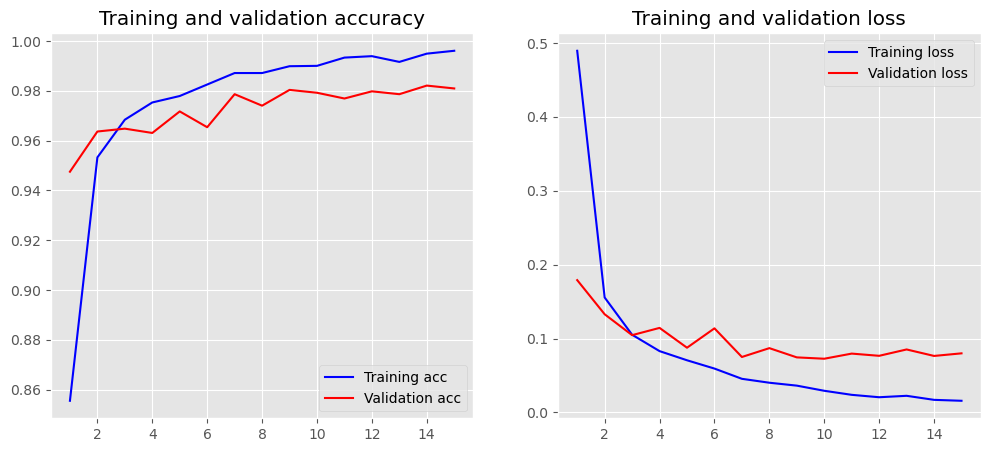

In [62]:
plot_history(history)

In [63]:
class_report = classification_report(y_test_class, y_pred_class)#, labels=[0, 1, 2, 3, 4])
print(class_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       213
           1       0.99      0.99      0.99       435
           2       0.95      0.96      0.96       184
           3       1.00      0.98      0.99       453
           4       1.00      0.99      1.00       550
           5       0.93      0.95      0.94       184
           6       1.00      0.99      0.99       148

    accuracy                           0.98      2167
   macro avg       0.98      0.98      0.98      2167
weighted avg       0.98      0.98      0.98      2167



In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 64)                49216     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 53831 (210.28 KB)
Trainable params: 53831 (210.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
model.save("sydney_category_model")

NameError: name 'model' is not defined

In [85]:
model.save_weights('my_model_weights.h5')

In [82]:
model.save('my_model.json')

INFO:tensorflow:Assets written to: my_model.json/assets


INFO:tensorflow:Assets written to: my_model.json/assets


In [114]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [68]:
import os
save_path = os.path.join("/home/ec2-user/SageMaker/model/1/")

In [69]:
tf.saved_model.save(model, save_path)

INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/model/1/assets


INFO:tensorflow:Assets written to: /home/ec2-user/SageMaker/model/1/assets


In [ ]:
####https://aws.amazon.com/blogs/machine-learning/deploy-trained-keras-or-tensorflow-models-using-amazon-sagemaker/

In [71]:
# from sagemaker import get_execution_role
# from sagemaker import Session
# role = get_execution_role()
# sess = Session()
# bucket = sess.default_bucket()

In [72]:
# import tensorflow as tf
# print(tf.__version__)  
# tf_framework_version = tf.__version__

2.13.0


In [74]:
#!pip install "h5py==2.10.0"
# import h5py
# import numpy as np

In [75]:
# import os
# import tensorflow as tf
# import tensorflow.keras as keras
# from keras.models import model_from_json
# from keras import backend as K

In [78]:
# mkdir keras_model

In [116]:
# notebook_dir = os.getcwd() 
# from tensorflow.keras.models import model_from_json

# with open(os.path.join(notebook_dir,"keras_model", "model.json"), "r") as fp:
#     loaded_model_json = fp.read()
# loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights('keras_model/my_model_weights.h5')

In [124]:
# from tensorflow.python.saved_model import builder
# from tensorflow.python.saved_model.signature_def_utils import predict_signature_def
# from tensorflow.python.saved_model import tag_constants
# # import tensorflow.python.keras.backend as K

# # Note: This directory structure will need to be followed 
# model_version = '1'
# export_dir = 'export/Servo/' + model_version

# # Build the Protocol Buffer SavedModel at path defined by export_dir variable
# builder = builder.SavedModelBuilder(export_dir)

# # Create prediction signature to be used by TensorFlow Serving Predict API
# signature = predict_signature_def(
#     inputs={"inputs": loaded_model.input}, outputs={"score": loaded_model.output})

# # Save the meta graph and variables
# builder.add_meta_graph_and_variables(
#     sess=K.get_session(), tags=[tag_constants.SERVING], signature_def_map={"serving_default": signature})

INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


In [118]:
# tf.compat.v1.disable_eager_execution()

In [125]:
# model_path = 'export/Servo/1/'
# !saved_model_cli show --all --dir {model_path}

# MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

# signature_def['serving_default']:
#   The given SavedModel SignatureDef contains the following input(s):
#     inputs['inputs'] tensor_info:
#         dtype: DT_FLOAT
#         shape: (-1, 50)
#         name: dense_1_input:0
#   The given SavedModel SignatureDef contains the following output(s):
#     outputs['score'] tensor_info:
#         dtype: DT_FLOAT
#         shape: (-1, 1)
#         name: dense_7/Sigmoid:0
#   Method name is: tensorflow/serving/predict

Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/bin/saved_model_cli", line 8, in <module>
    sys.exit(main())
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/tools/saved_model_cli.py", line 1309, in main
    app.run(smcli_main)
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/tools/saved_model_cli.py", line 1307, in smcli_main
    args.func()
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/tools/saved_model_cli.py", line 968, in show
    _show_all(_SMCLI_DIR.value)
  File "/home/ec2-user/anaconda3/envs/t

In [85]:
# model.save("sydney_category_model")

INFO:tensorflow:Assets written to: sydney_category_model/assets


INFO:tensorflow:Assets written to: sydney_category_model/assets


In [67]:
# import tensorflow as tf
# tf.saved_model.save(model, "./savedmodels/sydney_category/1/")

INFO:tensorflow:Assets written to: ./savedmodels/sydney_category/1/assets


INFO:tensorflow:Assets written to: ./savedmodels/sydney_category/1/assets


In [69]:
# !saved_model_cli show --dir ./savedmodels/sydney_category/1/ --tag_set
# serve --signature_def serving_default

SyntaxError: invalid syntax (300750876.py, line 2)

In [71]:
# model_path = 'export/Servo/1/'
# !saved_model_cli show --all --dir {model_path}

2023-12-07 14:48:22.368009: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 14:48:22.368049: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 14:48:22.368085: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/bin/saved_model_cli", line 8, in <module>
    sys.exit(main())
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/tools/saved_model_cli.py", line 1329, in main
    app.run(smcli_main)
  File "/home/ec2-user/anaconda3/envs

In [64]:
# import numpy as np
# MODEL_LOCATION='clf_trained_model.h5'

# JSON_LOCATION=''
# WEIGHTS_LOCATION=''

ValueError: tf.enable_eager_execution must be called at program startup.

In [242]:
# #tf.enable_eager_execution
# import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
# if MODEL_LOCATION!='':
#     from keras.models import load_model
#     model=load_model(MODEL_LOCATION)
#     print("loaded model from MODEL_LOCATION")
# elif JSON_LOCATION!='':
#     from keras.models import model_from_json
#     json_file=open(JSON_LOCATION,'r')
#     loaded_model_json=json_file.read()
#     json_file.close()
#     model=model_from_json(loaded_model_json)
#     model.load_weights(WEIGHTS_LOCATION)
#     print("loaded model from JSON_LOCATION AND WEIGHTS_LOCATION")

ValueError: tf.enable_eager_execution must be called at program startup.

In [200]:
# def convert_h5_to_aws(loaded_model):
#     from tensorflow.python.saved_model import builder
#     from tensorflow.python.saved_model.signature_def_utils import predict_signature_def
#     from tensorflow.python.saved_model import tag_constants
    
#     model_version ='1'
#     export_dir = 'export/Servo/' + model_version
    
#     builder = builder.SavedModelBuilder(export_dir)
    
#     signature= predict_signature_def(
#         inputs={"inputs":loaded_model.input},outputs = {'score':loaded_model.output})
    
#     from keras import backend as k
#     with k.get_session() as sess:
#         builder.add_meta_graph_and_variables(
#             sess=sess,tags=[tag_constants.SERVING],signature_def_map={"serving-default":signature})
#         builder.save()
        
#     import tarfile
#     with tarfile.open('model.tar.gz',mode='w:gz') as archive:
#         archive.add('export',recursive=True)

# convert_h5_to_aws(model)
    

AttributeError: module 'keras.backend' has no attribute 'get_session'

In [1]:
# import tensorflow as tf
# #tf.compat.v1.enable_eager_execution()
# import tensorflow.compat.v1 as tf
# #tf.compat.v1.disable_v2_behavior()
# tf.disable_v2_behavior()

2023-12-07 11:00:19.547897: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 11:00:19.547931: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 11:00:19.547956: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: module 'tensorflow' has no attribute 'disable_v2_behavior'

In [2]:
# import tensorflow as tf

In [215]:
# import tensorflow as tf
# from keras import backend as K
# from tensorflow.compat.v1.keras.backend import set_session
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# def convert_h5_to_aws(loaded_model):

# #     sess = tf.compat.v1.Session()
# #     K.set_session(sess)

#     from tensorflow.python.saved_model import builder
#     from tensorflow.python.saved_model.signature_def_utils import predict_signature_def 
#     from tensorflow.python.saved_model import tag_constants
    
#     model_version ='1'
#     export_dir = 'export/Servo' + model_version
    
#     builder = builder.SavedModelBuilder(export_dir) 
#     signature = predict_signature_def(
#         inputs={"inputs":loaded_model.input},
#         outputs={'score':loaded_model.output})
    
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
#         builder.add_meta_graph_and_variables(
#             sess=sess,
#             tags=[tag_constants.SERVING],
#             signature_def_map={"serving-default":signature}
#         )
#         builder.save()
#     #sess.close()

#     import tarfile
#     with tarfile.open('model.tar.gz',mode='w:gz') as archive: 
#         archive.add('export',recursive=True)

# convert_h5_to_aws(model)

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: export/Servo1/saved_model.pb


INFO:tensorflow:SavedModel written to: export/Servo1/saved_model.pb


In [216]:
# import sagemaker

# sagemaker_session=sagemaker.Session()
# inputs = sagemaker_session.upload_data(path='model.tar.gz',key_prefix='model')

In [229]:
# sagemaker_session

In [217]:
# print("Bucket name is")
# sagemaker_session.default_bucket()

Bucket name is


'sagemaker-us-east-2-993514063544'

In [218]:
# !touch train.py

In [219]:
# import boto3, re
# from sagemaker import get_execution_role

# role=get_execution_role()

# from sagemaker.tensorflow.model import TensorFlowModel
# sagemaker_model = TensorFlowModel(model_data = 's3://' + sagemaker_session.default_bucket() + '/model/model.tar.gz',
#                                  role=role,
#                                  framework_version = '1.12',
#                                  entry_point = 'train.py')

In [227]:
# %%timeit

# predictor = sagemaker_model.deploy(initial_instance_count=1,
#                                   instance_type = 'ml.g4dn.4xlarge',
#                                   endpoint_name='sydney_category_mapping')

# # predictor = llm_model.deploy(initial_instance_count=1, 
# #                              instance_type=instance_type, 
# #                              container_startup_health_check_timeout=health_check_timeout,
# #                              endpoint_name='llama2-7b-0920-g5')

-----------------------------------------*

UnexpectedStatusException: Error hosting endpoint sagemaker-tensorflow-serving-2023-12-06-16-32-10-680: Failed. Reason: The primary container for production variant AllTraffic did not pass the ping health check. Please check CloudWatch logs for this endpoint..

In [ ]:
# %%timeit

# predictor = sagemaker_model.deploy(initial_instance_count=1,
#                                   instance_type = 'ml.g4dn.4xlarge',
#                                   endpoint_name='sydney_category_mapping')

In [228]:
endpoint = predictor.endpoint

NameError: name 'predictor' is not defined

In [ ]:
endpoint

In [64]:
# model.save('classification_model_2.13.h5')

In [135]:
# export_dir = 'saved_model/'

# model.save(export_dir, save_format='tf')

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [141]:
# # Freeze saved model
# input_node_names = [inp.name.split(":")[0] for inp in model.inputs]
# output_node_names = [output.name.split(":")[0] for output in model.outputs]
# print("Input names: ", input_node_names)
# with tf.compat.v1.Session() as sess:
#     print(export_dir)
#     loaded = tf.saved_model.load(export_dir=export_dir, tags=["serve"]) 
#     frozen_graph = tf.compat.v1.graph_util.convert_variables_to_constants(sess,
#                                                                 sess.graph.as_graph_def(),
#                                                                 output_node_names)
#     tf.io.write_graph(graph_or_graph_def=frozen_graph, logdir=".", name="frozen_graph.pb", as_text=False)

# import tarfile
# tar = tarfile.open("frozen_graph.tar.gz", "w:gz")
# tar.add("frozen_graph.pb")
# tar.close()

Input names:  ['flatten_input']
saved_model/
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


AssertionError: dense_2/Softmax is not in graph

In [144]:
# import keras
# from keras.models import model_from_json
# from zipfile import ZipFile
# import os

# # Model definition
# # model = keras.Sequential()
# # ... Add model layers

# # Serialize model to JSON
# model_json = model.to_json()

# # Save model JSON
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
    
# # Save weights
# model.save_weights("model-weights.h5")

# # Create a zip file
# with ZipFile("model.zip","w") as archive:
#     archive.write("model.json")
#     archive.write("model-weights.h5")

# # Remove temporary json and weights files
# # os.remove("model.json") 
# # os.remove("model-weights.h5")

In [122]:
# from sagemaker import get_execution_role
# from sagemaker import Session
# role = get_execution_role()
# sess = Session()
# bucket = sess.default_bucket()

In [123]:
role

'arn:aws:iam::993514063544:role/tenxeng-sageamker-role'

In [124]:
# import tensorflow as tf
# print(tf.__version__)

2.14.0


In [132]:
!mkdir keras_model

In [145]:
!wget model.zip
!unzip model.zip -d keras_model

--2023-12-05 17:03:51--  http://model.zip/
Resolving model.zip (model.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘model.zip’
Archive:  model.zip
 extracting: keras_model/model.json  
 extracting: keras_model/model-weights.h5  


In [146]:
#n

In [147]:
# !mkdir keras_model
# !wget https://s3.amazonaws.com/aws-ml-blog/artifacts/keras-tensorflow-model-deployment/model.zip
# !unzip model.zip -d keras_model

In [148]:
import os
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import model_from_json
from keras import backend as K

In [149]:
K.set_learning_phase(0)

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [182]:
# # import os
# # import tensorflow as tf
# # import tensorflow.keras as keras
# # from keras.models import model_from_json

# with open(os.path.join('keras_model', 'model.json'), 'r') as fp:
#     loaded_model_json = fp.read()
# loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights('keras_model/model-weights.h5')

In [183]:
# from tensorflow.python.saved_model import builder
# from tensorflow.python.saved_model.signature_def_utils import predict_signature_def
# from tensorflow.python.saved_model import tag_constants

In [184]:
# model_version = '1'
# export_dir = 'export/Servo/' + model_version

In [186]:
# builder = builder.SavedModelBuilder(export_dir)

In [187]:
# tf.compat.v1.disable_eager_execution()
# with tf.compat.v1.Session() as sess:
#   signature = tf.compat.v1.saved_model.predict_signature_def(
#       inputs={"inputs": model.input}, outputs={"score": model.output})
#   builder.add_meta_graph_and_variables(
#     sess=tf.compat.v1.Session(), tags=[tag_constants.SERVING], signature_def_map={"serving_default": signature})
#   builder.save()
# tf.compat.v1.enable_eager_execution()

INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


FailedPreconditionError: Graph execution error:

Detected at node 'total_3/Read/ReadVariableOp' defined at (most recent call last):
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 86, in _run_code
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/events.py", line 80, in _run
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    File "/tmp/ipykernel_1151/2770882750.py", line 7, in <module>
Node: 'total_3/Read/ReadVariableOp'
Detected at node 'dense_1/kernel_2/Read/ReadVariableOp' defined at (most recent call last):
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 86, in _run_code
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/events.py", line 80, in _run
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    File "/tmp/ipykernel_1151/2689707470.py", line 8, in <module>
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/saving/legacy/model_config.py", line 125, in model_from_json
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/layers/serialization.py", line 299, in deserialize_from_json
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/layers/serialization.py", line 276, in deserialize
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/saving/serialization_lib.py", line 609, in deserialize_keras_object
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/saving/serialization_lib.py", line 728, in deserialize_keras_object
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 471, in from_config
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 229, in add
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/base_layer_v1.py", line 814, in __call__
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/base_layer_v1.py", line 2182, in _maybe_build
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/layers/core/dense.py", line 154, in build
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/base_layer_v1.py", line 459, in add_weight
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/base_layer_utils.py", line 137, in make_variable
Node: 'dense_1/kernel_2/Read/ReadVariableOp'
2 root error(s) found.
  (0) FAILED_PRECONDITION: Could not find variable total_3. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status error message=Container localhost does not exist. (Could not find resource: localhost/total_3)
	 [[{{node total_3/Read/ReadVariableOp}}]]
  (1) FAILED_PRECONDITION: Could not find variable dense_1/kernel_2. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status error message=Container localhost does not exist. (Could not find resource: localhost/dense_1/kernel_2)
	 [[{{node dense_1/kernel_2/Read/ReadVariableOp}}]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'total_3/Read/ReadVariableOp':
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 196, in _run_module_as_main
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 86, in _run_code
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/events.py", line 80, in _run
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
  File "/tmp/ipykernel_1151/2770882750.py", line 7, in <module>
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 900, in load
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 1031, in load_partial
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 223, in __init__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 320, in _load_all
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 535, in _load_nodes
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 654, in _recreate
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 673, in _recreate_default
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 665, in <lambda>
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 789, in _recreate_variable
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/variables.py", line 195, in __call__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/variables.py", line 1227, in _variable_call
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/variables.py", line 56, in getter
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 766, in uninitialized_variable_creator
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/variables.py", line 198, in __call__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 2286, in __init__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/gen_resource_variable_ops.py", line 547, in read_variable_op
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/framework/op_def_library.py", line 796, in _apply_op_helper
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 2657, in _create_op_internal
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 1161, in from_node_def


In [180]:

# builder.add_meta_graph_and_variables(
#     sess=tf.compat.v1.Session(), tags=[tag_constants.SERVING], signature_def_map={"serving_default": signature})
# builder.save()
# tf.compat.v1.enable_eager_execution()

INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to save.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


FailedPreconditionError: Graph execution error:

Detected at node 'iteration_1/Read/ReadVariableOp' defined at (most recent call last):
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 86, in _run_code
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/events.py", line 80, in _run
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    File "/tmp/ipykernel_1151/1182112667.py", line 7, in <module>
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1393, in <lambda>
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1370, in __init__
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1084, in __init__
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 105, in __init__
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1144, in _create_iteration_variable
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 113, in _create_iteration_variable
Node: 'iteration_1/Read/ReadVariableOp'
Detected at node 'Adam/m/dense_1/bias/Read/ReadVariableOp' defined at (most recent call last):
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 86, in _run_code
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/events.py", line 80, in _run
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
    File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    File "/tmp/ipykernel_1151/1182112667.py", line 7, in <module>
Node: 'Adam/m/dense_1/bias/Read/ReadVariableOp'
2 root error(s) found.
  (0) FAILED_PRECONDITION: Could not find variable iteration_1. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status error message=Container localhost does not exist. (Could not find resource: localhost/iteration_1)
	 [[{{node iteration_1/Read/ReadVariableOp}}]]
  (1) FAILED_PRECONDITION: Could not find variable Adam/m/dense_1/bias. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status error message=Container localhost does not exist. (Could not find resource: localhost/Adam/m/dense_1/bias)
	 [[{{node Adam/m/dense_1/bias/Read/ReadVariableOp}}]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'iteration_1/Read/ReadVariableOp':
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 196, in _run_module_as_main
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/runpy.py", line 86, in _run_code
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 728, in start
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/asyncio/events.py", line 80, in _run
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
  File "/tmp/ipykernel_1151/1182112667.py", line 7, in <module>
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 900, in load
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 1031, in load_partial
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 223, in __init__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 320, in _load_all
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 535, in _load_nodes
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 654, in _recreate
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 673, in _recreate_default
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 660, in <lambda>
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/load.py", line 690, in _recreate_user_object
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/revived_types.py", line 168, in deserialize
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/saved_model/revived_types.py", line 88, in from_proto
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1393, in <lambda>
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1370, in __init__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1084, in __init__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 105, in __init__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1144, in _create_iteration_variable
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 113, in _create_iteration_variable
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/variables.py", line 195, in __call__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/variables.py", line 1227, in _variable_call
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/variables.py", line 1220, in <lambda>
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 355, in default_variable_creator_v2
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/variables.py", line 198, in __call__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 1809, in __init__
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 2051, in _init_from_args
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/ops/gen_resource_variable_ops.py", line 547, in read_variable_op
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/framework/op_def_library.py", line 796, in _apply_op_helper
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 2657, in _create_op_internal
  File "/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 1161, in from_node_def


In [110]:
import sagemaker

In [126]:
# #ml.g4dn.4xlarge
# from sagemaker.serializers import CSVSerializer
# model_predictor=model.deploy(
#     initial_instance_count=1,
#     instance_type='ml.g4dn.4xlarge',
#     serializer=CSVSerializer()
# )

AttributeError: 'Sequential' object has no attribute 'deploy'

In [116]:
role

'arn:aws:iam::993514063544:role/tenxeng-sageamker-role'

In [59]:
#####predicting the unlabelled data###

In [60]:
data = pd.read_excel(r"Sydney Category FINAL (2).xlsx",sheet_name="Sheet2")

In [61]:
filtered_data=data[data["Sydney Category"].isna()]

In [62]:
unique_combinations = df_2_columns[["Category Name","Service Name"]].drop_duplicates()

In [63]:
merged_df=filtered_data.merge(unique_combinations,on=["Category Name","Service Name"],how="left",indicator = True)

In [64]:
records_not_in_df=merged_df[merged_df["_merge"] == "left_only"]

In [65]:
records_not_in_df = records_not_in_df.drop(columns=["_merge"])

In [66]:
records_not_in_df["Category Name"]=records_not_in_df["Category Name"].str.lower()
records_not_in_df["Service Name"]=records_not_in_df["Service Name"].str.lower()

In [67]:
records_not_in_df["combined"]=records_not_in_df["Service Name"] + " " + records_not_in_df["Category Name"]

In [68]:
X_filtered = records_not_in_df["combined"].str.lower()

In [69]:
X_filtered=X_filtered.tolist()

In [248]:
X_filtered

['alcohol/substance - inpatient professional alcohol/substance abuse',
 'alcohol/substance - inpatient professional - base alcohol/substance abuse',
 'alcohol/substance - inpatient professional - major medical alcohol/substance abuse',
 'alcohol/substance - intensive outpatient therapy (iop) institutional alcohol/substance abuse',
 'alcohol/substance - intensive outpatient therapy (iop) institutional - base alcohol/substance abuse',
 'alcohol/substance - intensive outpatient therapy (iop) institutional - major medical alcohol/substance abuse',
 'alcohol/substance - office professional alcohol/substance abuse',
 'alcohol/substance - office professional - base alcohol/substance abuse',
 'alcohol/substance - office professional - major medical alcohol/substance abuse',
 'alcohol/substance - office professional - pcp alcohol/substance abuse',
 'alcohol/substance - office professional - specialist alcohol/substance abuse',
 'alcohol/substance - outpatient institutional alcohol/substance abu

In [4]:
%%time
chunk_size = 10
X_predict_embeddings = []

for i in range(0, len(X_filtered), chunk_size):
    chunk = X_filtered[i:i+chunk_size]
    print(i)
    print(chunk)
    
#     # Tokenize sentences 
#     input_ids = tokenizer(chunk, return_tensors='pt', padding=True)
    
#     # Generate embeddings for chunk 
#     outputs = model(input_ids)
#     chunk_embeddings = outputs.last_hidden_state
    chunk_embeddings = tokenize_bert_embeddings(chunk)
    # Append to list
    X_predict_embeddings.append(chunk_embeddings)
# Concatenate into single tensor    
X_predict_full_embeddings = tf.concat(X_predict_embeddings,axis=0)

print(X_predict_full_embeddings.shape)

NameError: name 'X_filtered' is not defined

In [5]:
X_predict_full_embeddings

NameError: name 'X_predict_full_embeddings' is not defined

In [71]:
X_predict_tensors = tf.convert_to_tensor(X_predict_full_embeddings)

In [22]:
# tf.compat.v1.disable_eager_execution()
# #import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# import tensorflow
# tensorflow.python.framework.ops.disable_eager_mode

AttributeError: module 'tensorflow.compat.v1' has no attribute 'disable_v1_behavior'

In [272]:
#X_predict_tensors
np.savetxt('my_file.txt',X_predict_tensors)

In [72]:
y_pred_probs=model.predict(X_predict_tensors)

438/438 [==============================] - 0s 1ms/step


In [73]:
y_pred_probs[0]

array([1.0146270e-04, 5.1021236e-01, 9.3796496e-07, 1.7935116e-06,
       4.1966903e-01, 7.0014410e-02, 2.1448874e-09], dtype=float32)

In [74]:
labelencoder.inverse_transform([0,1,2,3,4,5,6])

array(['emergency care', 'mental health', 'office visits',
       'preventive services', 'therapy services', 'unknown category',
       'urgent care'], dtype=object)

In [75]:
import numpy as np
predictions=np.argmax(y_pred_probs,axis=1)

In [76]:
predictions_text=labelencoder.inverse_transform(predictions)

In [77]:
records_not_in_df["predicted_sydney_category"] = predictions_text

In [78]:
predicted_df = records_not_in_df.copy()

In [6]:
predicted_df

NameError: name 'predicted_df' is not defined

In [88]:
text="'alcohol/substance - inpatient professional alcohol/substance abuse'"

In [89]:
embeddings = tokenize_bert_embeddings(text)

In [7]:
embeddings

NameError: name 'embeddings' is not defined

In [91]:
X_predict_tensors = tf.convert_to_tensor(embeddings)

In [92]:
X_predict_tensors

<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[ 8.94277841e-02,  2.19869660e-03,  1.27472728e-01,
        -1.98757663e-01,  1.19248152e-01,  1.23279713e-01,
         1.95853889e-01,  1.45272046e-01,  1.16167530e-01,
        -3.10196020e-02, -7.89613575e-02,  1.07487306e-01,
        -9.82901603e-02, -5.30484989e-02,  2.21332341e-01,
         4.91540670e-01,  2.57690456e-02,  1.21096574e-01,
         1.76101655e-01,  2.16067761e-01, -6.88567618e-03,
        -4.14752252e-02, -2.12732047e-01, -1.05778597e-01,
         2.22023055e-01,  6.34561658e-01,  7.15025216e-02,
         6.75072446e-02, -5.67512214e-01, -1.17325321e-01,
         4.07659590e-01,  1.23129211e-01,  1.15544163e-01,
         4.66905646e-02,  8.13109800e-02,  2.63438135e-01,
        -8.53131562e-02, -1.20257176e-01, -1.75537750e-01,
         9.72548574e-02, -2.66205311e-01, -3.96399051e-01,
        -1.85372084e-01, -2.47893289e-01,  1.03334352e-01,
        -1.51690049e-02, -1.33479331e-02, -2.09310368e-01,
      

In [93]:
import sagemaker

sagemaker_session=sagemaker.Session()

In [137]:
import sagemaker
from sagemaker.tensorflow.model import TensorFlowModel
#from sagemaker.tensorflow import NumpySerializer
from sagemaker.serializers import JSONSerializer
sagemaker_session = sagemaker.Session()
endpoint_name="sydneycategorymapping-updated"

predictor = sagemaker.tensorflow.model.TensorFlowPredictor(endpoint_name,sagemaker_session)#,serializer=JSONSerializer())#,sagemaker_session)
predictor_1 = sagemaker.predictor.Predictor(endpoint_name=endpoint_name)

In [131]:
import numpy as np
numpy_data = np.array(X_predict_tensors)
test_data=np.asarray([X_predict_tensors])

In [112]:
input_array = X_predict_tensors.numpy()
binary_data = input_array.tobytes()

In [96]:
numpy_data

array([[ 8.94277841e-02,  2.19869660e-03,  1.27472728e-01,
        -1.98757663e-01,  1.19248152e-01,  1.23279713e-01,
         1.95853889e-01,  1.45272046e-01,  1.16167530e-01,
        -3.10196020e-02, -7.89613575e-02,  1.07487306e-01,
        -9.82901603e-02, -5.30484989e-02,  2.21332341e-01,
         4.91540670e-01,  2.57690456e-02,  1.21096574e-01,
         1.76101655e-01,  2.16067761e-01, -6.88567618e-03,
        -4.14752252e-02, -2.12732047e-01, -1.05778597e-01,
         2.22023055e-01,  6.34561658e-01,  7.15025216e-02,
         6.75072446e-02, -5.67512214e-01, -1.17325321e-01,
         4.07659590e-01,  1.23129211e-01,  1.15544163e-01,
         4.66905646e-02,  8.13109800e-02,  2.63438135e-01,
        -8.53131562e-02, -1.20257176e-01, -1.75537750e-01,
         9.72548574e-02, -2.66205311e-01, -3.96399051e-01,
        -1.85372084e-01, -2.47893289e-01,  1.03334352e-01,
        -1.51690049e-02, -1.33479331e-02, -2.09310368e-01,
        -2.89879799e-01,  1.69162720e-01, -5.43905139e-0

In [125]:
# import json
# import numpy as np

# def numpy_to_json(data):
#     return json.dumps(data.tolist())

# data = np.array([[1, 2, 3], [4, 5, 6]])
# json_data = numpy_to_json(numpy_data)
serialized_input = JSONSerializer().serialize(numpy_data)

In [138]:
data=predictor.predict(test_data)

ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received client error (400) from primary with message "{    "error": "Session was not created with a graph before Run()!"}". See https://us-east-2.console.aws.amazon.com/cloudwatch/home?region=us-east-2#logEventViewer:group=/aws/sagemaker/Endpoints/sydneycategorymapping-updated in account 993514063544 for more information.

In [103]:
y_pred_probs_test=model.predict(numpy_data)

1/1 [==============================] - 0s 16ms/step


In [104]:
y_pred_probs_test

array([[4.0893818e-07, 9.9721694e-01, 3.0351343e-06, 6.9375699e-07,
        3.0245775e-07, 2.7786419e-03, 3.0516663e-08]], dtype=float32)

In [139]:
model = tf.keras.models.load_model('sydney_category_model')

model.predict(numpy_data)

1/1 [==============================] - 0s 44ms/step


array([[4.0893818e-07, 9.9721694e-01, 3.0351343e-06, 6.9375699e-07,
        3.0245775e-07, 2.7786419e-03, 3.0516663e-08]], dtype=float32)

In [97]:
import boto3
sm_client = boto3.client('sagemaker')

response = sm_client.describe_endpoint(
    EndpointName='sydneycategorymapping-version'
)
print(response['EndpointConfigName'])
print(response)

sydneycategorymapping-version
{'EndpointName': 'sydneycategorymapping-version', 'EndpointArn': 'arn:aws:sagemaker:us-east-2:993514063544:endpoint/sydneycategorymapping-version', 'EndpointConfigName': 'sydneycategorymapping-version', 'ProductionVariants': [{'VariantName': 'AllTraffic', 'DeployedImages': [{'SpecifiedImage': '763104351884.dkr.ecr.us-east-2.amazonaws.com/tensorflow-inference:2.13.0-gpu', 'ResolvedImage': '763104351884.dkr.ecr.us-east-2.amazonaws.com/tensorflow-inference@sha256:3e7309182006f25f0effb90fe920aefe472168bb30d3e517d96492862e1d4236', 'ResolutionTime': datetime.datetime(2023, 12, 7, 15, 44, 42, 312000, tzinfo=tzlocal())}], 'CurrentWeight': 1.0, 'DesiredWeight': 1.0, 'CurrentInstanceCount': 1, 'DesiredInstanceCount': 1}], 'EndpointStatus': 'InService', 'CreationTime': datetime.datetime(2023, 12, 7, 15, 44, 41, 742000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2023, 12, 7, 15, 50, 3, 565000, tzinfo=tzlocal()), 'ResponseMetadata': {'RequestId': 'aa7d21a

In [ ]:
763104351884.dkr.ecr.us-east-2.amazonaws.com/tensorflow-inference:2.13.0-gpu

In [80]:
# Normalize to 0-1 range 
probs = (y_pred_probs - np.min(y_pred_probs)) / (np.max(y_pred_probs) - np.min(y_pred_probs))

# Round to 2 decimal places  
probs = np.round(probs, 2) 

# Convert to ints based on >= 0.5 threshold
#probs_ints = (probs >= 0.5).astype(int)

#print(probs_ints)

In [81]:
probs[0:100]

array([[0.  , 0.51, 0.  , 0.  , 0.42, 0.07, 0.  ],
       [0.  , 0.93, 0.  , 0.  , 0.07, 0.  , 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.29, 0.06, 0.  ],
       [0.  , 0.03, 0.  , 0.  , 0.97, 0.  , 0.  ],
       [0.  , 0.06, 0.  , 0.  , 0.94, 0.  , 0.  ],
       [0.  , 0.02, 0.  , 0.  , 0.98, 0.  , 0.  ],
       [0.  , 0.07, 0.  , 0.  , 0.01, 0.92, 0.  ],
       [0.  , 0.57, 0.  , 0.  , 0.14, 0.29, 0.  ],
       [0.  , 0.49, 0.  , 0.  , 0.06, 0.44, 0.  ],
       [0.  , 0.52, 0.  , 0.  , 0.  , 0.47, 0.  ],
       [0.01, 0.07, 0.  , 0.  , 0.04, 0.88, 0.  ],
       [0.  , 0.69, 0.  , 0.  , 0.3 , 0.01, 0.  ],
       [0.  , 0.88, 0.  , 0.  , 0.12, 0.  , 0.  ],
       [0.  , 0.56, 0.  , 0.  , 0.41, 0.03, 0.  ],
       [0.  , 0.32, 0.  , 0.  , 0.66, 0.02, 0.  ],
       [0.  , 0.9 , 0.  , 0.  , 0.1 , 0.  , 0.  ],
       [0.  , 0.76, 0.  , 0.  , 0.21, 0.03, 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.02, 0.  , 0.  ],
       [0.  , 0.89, 0.  , 0.  ,

In [98]:
threshold=0.85
samples_below_threshold=[]
features_below_threshold=[]
samples_above_threshold=[]
features_above_threshold=[]

In [99]:
for i,sample_probs in enumerate(probs):
    if any(prob >=threshold for prob in sample_probs):
        predicted_class = np.argmax(sample_probs)
        print(f"sample {i+1}: classified as Class {predicted_class}")
        samples_above_threshold.append(i+1)
        features_above_threshold.append(records_not_in_df.iloc[i])
    else:
        samples_below_threshold.append(i+1)
        features_below_threshold.append(records_not_in_df.iloc[i])

sample 2: classified as Class 1
sample 4: classified as Class 4
sample 5: classified as Class 4
sample 6: classified as Class 4
sample 7: classified as Class 5
sample 11: classified as Class 5
sample 13: classified as Class 1
sample 16: classified as Class 1
sample 18: classified as Class 1
sample 19: classified as Class 1
sample 20: classified as Class 1
sample 24: classified as Class 1
sample 25: classified as Class 1
sample 26: classified as Class 1
sample 27: classified as Class 1
sample 28: classified as Class 1
sample 30: classified as Class 1
sample 31: classified as Class 1
sample 32: classified as Class 1
sample 33: classified as Class 1
sample 34: classified as Class 1
sample 35: classified as Class 1
sample 36: classified as Class 1
sample 37: classified as Class 1
sample 38: classified as Class 1
sample 39: classified as Class 1
sample 40: classified as Class 1
sample 42: classified as Class 1
sample 44: classified as Class 1
sample 47: classified as Class 1
sample 50: clas

In [100]:
len(samples_below_threshold)

3376

In [103]:
len(samples_above_threshold)

10636

In [101]:
if samples_below_threshold:
    review_df = pd.DataFrame({"sample Index" : samples_below_threshold})
    #print(review_df)
    review_df=review_df.reset_index(inplace=True, drop=True)
    review_df = pd.concat([review_df,pd.DataFrame(features_below_threshold)],axis=1)#.reset_index(drop=True)
#     review_df=review_df.reset_index()
    review_df.to_excel("samples_below_threshold_85.xlsx",index=False)

In [102]:
if samples_above_threshold:
    above_review_df = pd.DataFrame({"sample Index" : samples_above_threshold})
    #print(review_df)
    above_review_df=above_review_df.reset_index(inplace=True, drop=True)
    above_review_df = pd.concat([above_review_df,pd.DataFrame(features_above_threshold)],axis=1)#.reset_index(drop=True)
#     review_df=review_df.reset_index()
    above_review_df.to_excel("samples_above_threshold_85.xlsx",index=False)